In [87]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


api_key = 'ixKi2AscQwRNdxrARR5q'
def grab_initial_data():
    state_df = pd.read_csv("state_abv.csv")
    fiddy_states = state_df['Postal Code'].to_list()

    main_df = pd.DataFrame()
    for abbv in fiddy_states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken = api_key)
        df.drop('SA Value',axis='columns', inplace=True)
        df.rename(columns={'NSA Value':str(abbv)}, inplace=True)
        df[abbv] = (df[abbv]- df[abbv][0])/df[abbv][0] * 100
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    pickle_out = open('fiddy_states3.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close() 
grab_initial_data()


In [108]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken = api_key)
    df.drop('SA Value',axis='columns', inplace=True)
    df.rename(columns={'NSA Value':'United States'}, inplace=True)
    
    df["United States"] = (df["United States"]- df["United States"][0])/df["United States"][0] * 100
    return df


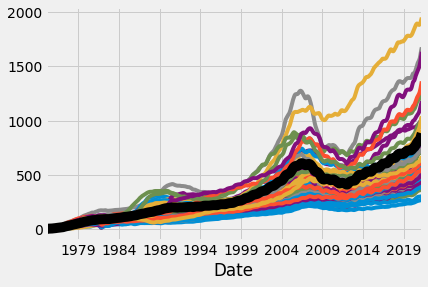

In [113]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

benchmark = HPI_Benchmark()

HPI_data.plot(ax=ax1)
benchmark.plot(ax=ax1,color='k', linewidth = 10)

plt.legend().remove()
plt.show()

In [114]:
HPI_State_Corr = HPI_data.corr()

In [115]:
HPI_State_Corr.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.973933,0.951994,0.950180,0.975449,0.959887,0.952683,0.914955,0.960011,0.943552,0.949408,...,0.968431,0.971070,0.942637,0.957289,0.966759,0.970896,0.965798,0.967889,0.970317,0.955148
std,0.019850,0.030018,0.019841,0.019691,0.016632,0.030079,0.043487,0.027337,0.033079,0.020449,...,0.026260,0.021555,0.035024,0.029220,0.024294,0.020356,0.022561,0.023576,0.020244,0.030990
min,0.912310,0.841171,0.892441,0.904854,0.913123,0.838266,0.824646,0.896965,0.827357,0.896575,...,0.881480,0.896495,0.829468,0.847659,0.886715,0.893322,0.876052,0.879565,0.917768,0.844099
25%,0.963438,0.941686,0.938626,0.967655,0.952162,0.941158,0.884758,0.947469,0.934474,0.938025,...,0.960214,0.960686,0.931358,0.945476,0.957325,0.963817,0.959280,0.957487,0.956841,0.945128
50%,0.978759,0.958808,0.951538,0.978217,0.961113,0.956189,0.915460,0.961887,0.950327,0.948783,...,0.976336,0.975151,0.946163,0.962416,0.971819,0.976546,0.968518,0.974283,0.975367,0.964779
75%,0.987158,0.968963,0.959749,0.990683,0.970525,0.971747,0.948008,0.980986,0.964276,0.961513,...,0.985981,0.987298,0.969353,0.976764,0.983958,0.983395,0.977878,0.984502,0.985364,0.973079
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
